In [14]:
from __future__ import annotations

import os
from pathlib import Path

import pandas as pd
from plotting_utils import (
    plot_final_performance_comparison,
    plot_improvement_probability,
    plot_performance_over_time,
)

In [15]:
# Find experiment directories
seeds = range(5)
methods = [
    "base_algorithm",
    "domain_randomization",
]
benchmarks = ["MiniGrid-Empty-Random-5x5-v0", "MiniGrid-LavaGapS5-v0", "MiniGrid-RedBlueDoors-8x8-v0"]
base_path = "../runs"
experiment_directories = []

for b in benchmarks:
    for m in methods:
        for s in seeds:
            experiment_directories.append(
                os.path.join(base_path, f"{m}", f"{b}", f"seed_{s}")
            )

In [16]:
def load_data(experiment_dir):
    path_strings = experiment_dir.split("/")
    method = path_strings[-3]
    env = path_strings[-2]
    seed = int(path_strings[-1].split("_")[-1])

    path = Path(experiment_dir)
    results = pd.read_csv(path / "results.csv")
    evals = pd.read_csv(path / "eval_results.csv")

    results["method"] = method
    results["env"] = env
    results["seed"] = seed
    evals["method"] = method
    evals["env"] = env
    evals["seed"] = seed
    return results, evals

In [17]:
rs, es = [], []
for experiment_dir in experiment_directories:
    if not os.path.exists(experiment_dir):
        print(f"Experiment directory {experiment_dir} does not exist.")
        continue

    results, evals = load_data(experiment_dir)
    rs.append(results)
    es.append(evals)

# Concatenate all results and evals
results = pd.concat(rs, ignore_index=True)
evals = pd.concat(es, ignore_index=True)

<Figure size 1800x900 with 0 Axes>

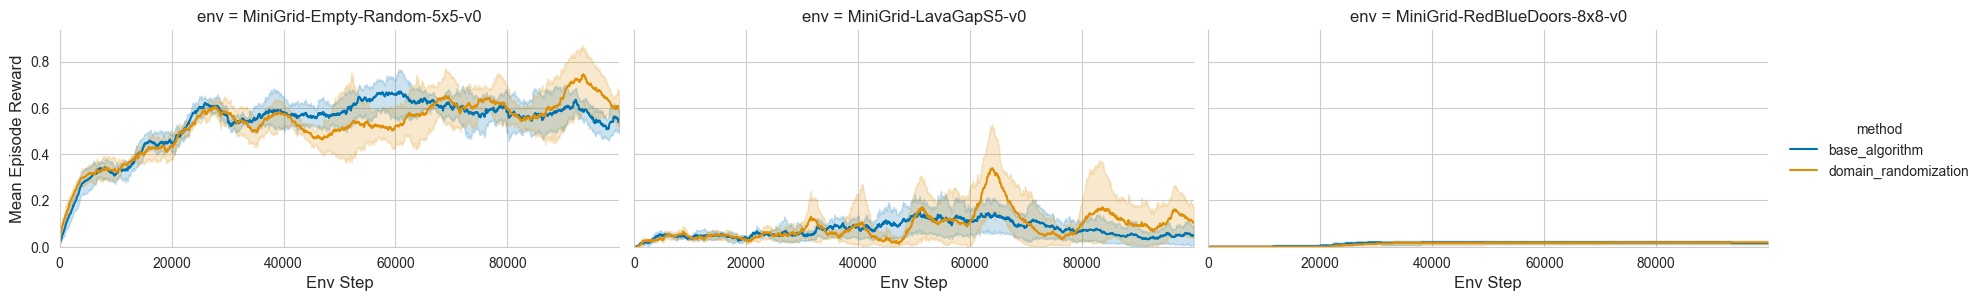

In [18]:
train_rew_plot = plot_performance_over_time(
    results,
    x="step",
    y="mean_episode_reward",
    hue="method",
    aggregation="mean",
    logx=False,
    xlabel="Env Step",
    ylabel="Mean Episode Reward",
    col="env",
)

<Figure size 1800x900 with 0 Axes>

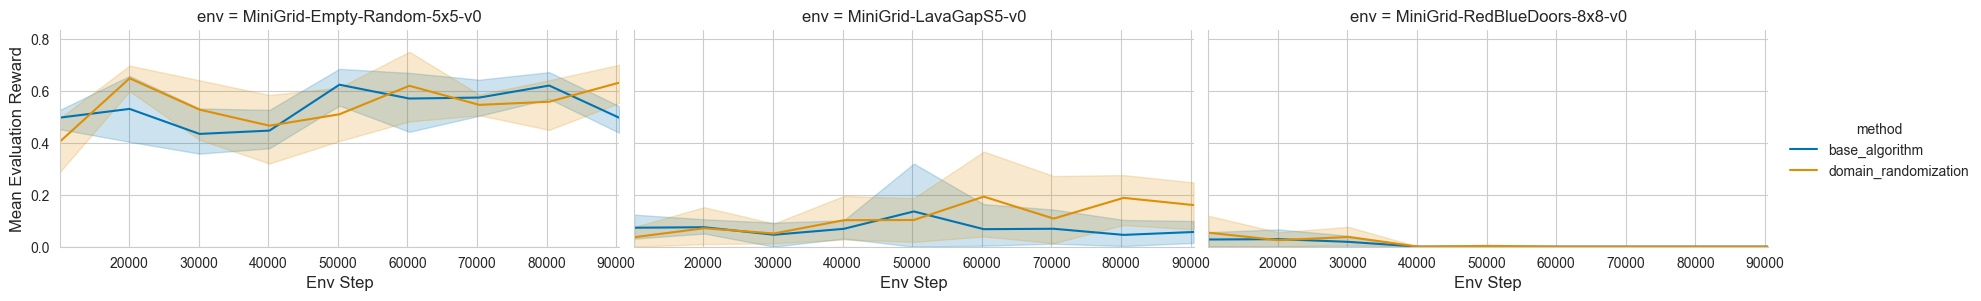

In [19]:
eval_rew_plot = plot_performance_over_time(
    evals,
    x="step",
    y="mean_eval_reward",
    hue="method",
    aggregation="mean",
    logx=False,
    xlabel="Env Step",
    ylabel="Mean Evaluation Reward",
    col="env",
)

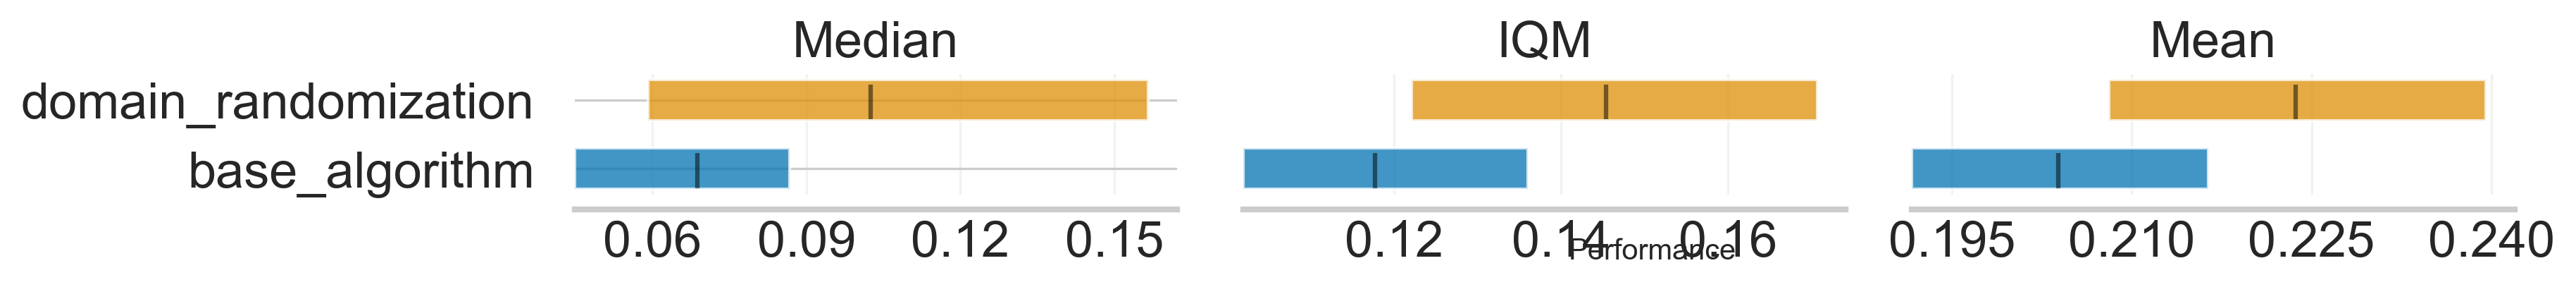

In [20]:
final_perf_plot = plot_final_performance_comparison(
    evals,
    x="method",
    y="mean_eval_reward",
    aggregation=["mean", "median", "iqm"],
    xlabel="Performance",
)

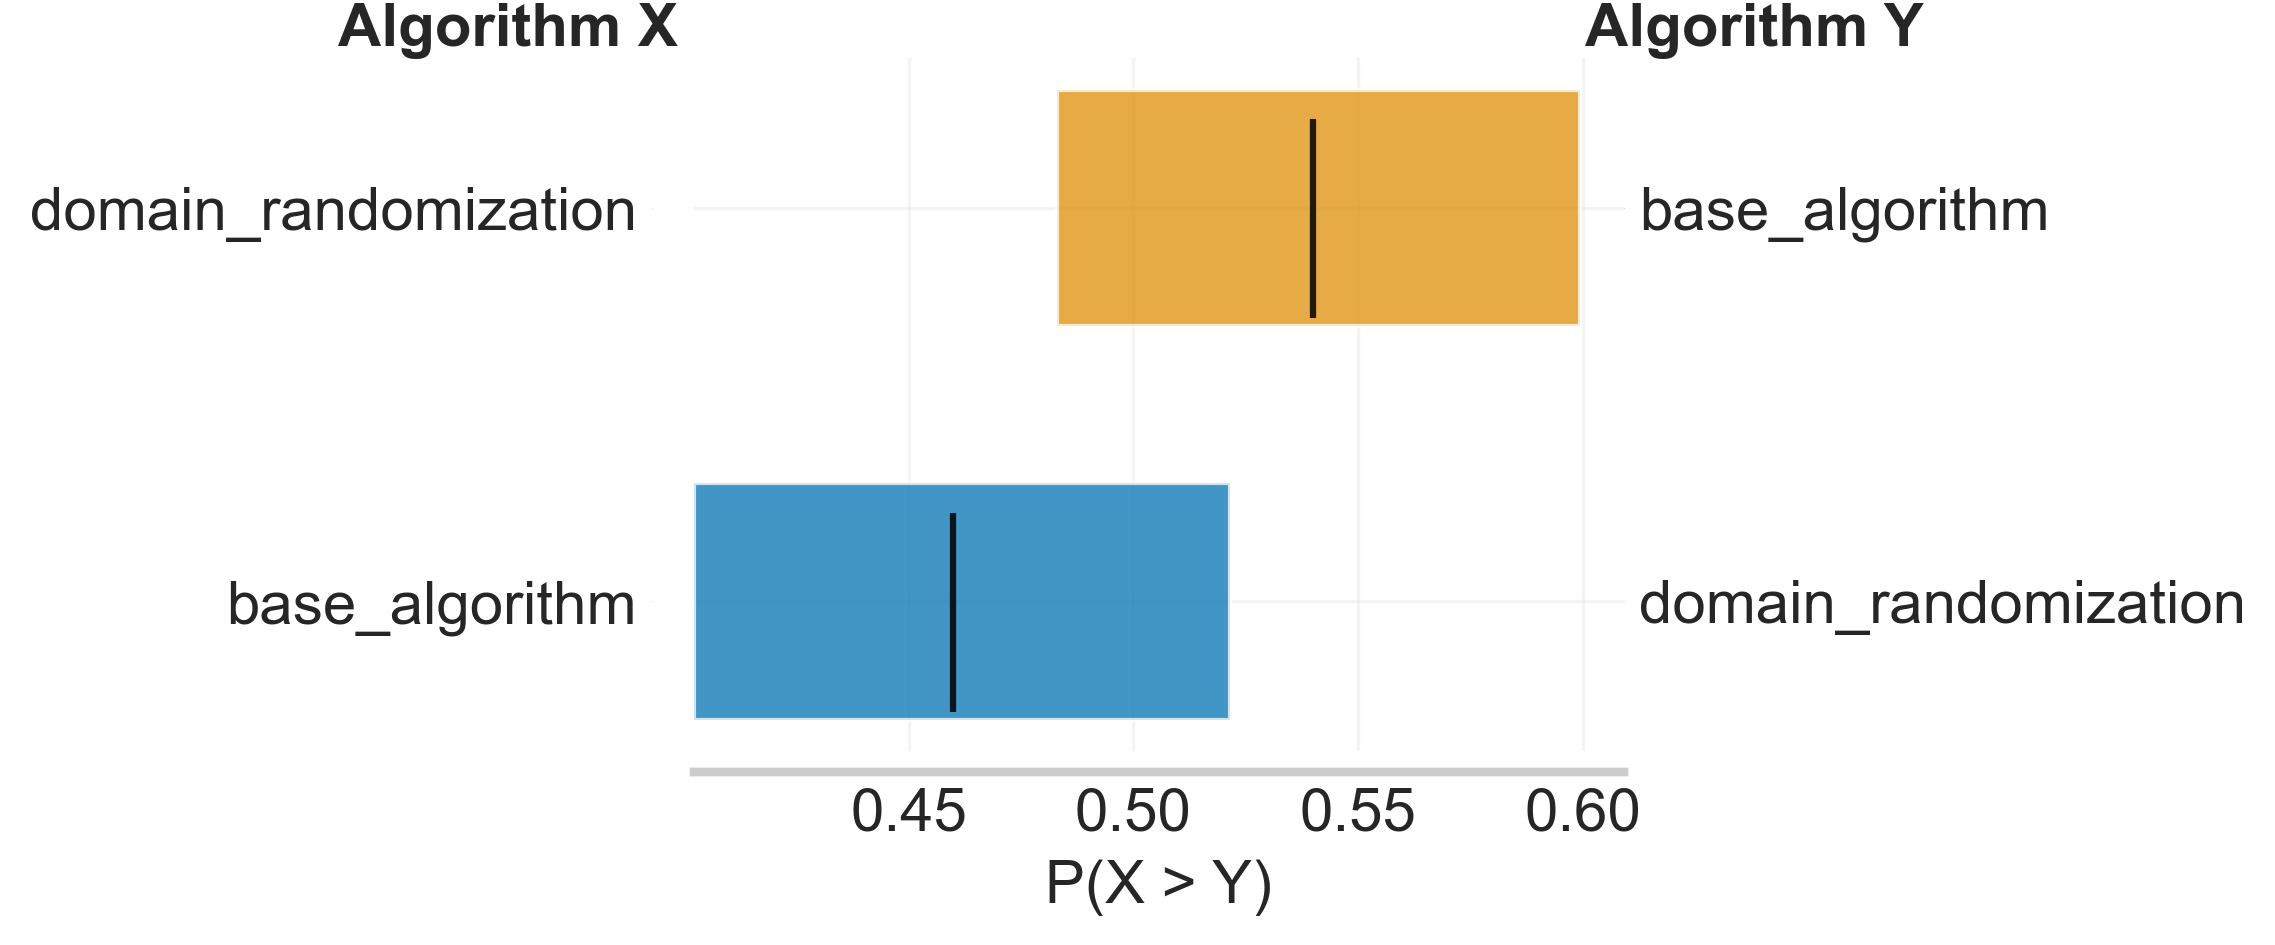

In [21]:
imp_prob_plot = plot_improvement_probability(evals, x="method", y="mean_eval_reward")